In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de datos
import re
from nltk.corpus import stopwords
from pattern.text.en import singularize, lemma
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn.preprocessing
import pyclustertend 
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from ast import literal_eval
from sklearn.decomposition import PCA

from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform

# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [2]:
# Global Variables
seed = random.seed(123)

# Analisis Exploratorio

In [3]:
# Variable classification
data = pd.read_csv('./data.csv', encoding = "ISO-8859-1")
data = data.drop('index', axis=1)
data = data.explode('sectionName')
data = data.explode('virtualAddress')
data = data.explode('virtualSize')
data = data.explode('rawDataSize')
data = data.explode('dll')
data = data.explode('functions')

In [4]:
print('Number of columns:', len(data))
data.head()

Number of columns: 40


,filename,sectionName,virtualAddress,virtualSize,rawDataSize,dll,functions,date
0,RTC_7F85D7F628CE62D1D8F7B39D8940472,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x4000', '0x5000', '0x1f0000']","['0x288a', '0x990', '0x1ea098', '0x390']","[10752, 2560, 2048, 1024]","['KERNEL32.DLL', 'MSVCRT.dll', 'SHELL32.dll', ...","['TerminateProcess', 'AllocConsole', 'MultiByt...",Mon May 30 08:29:29 2011 UTC
1,FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xea6', '0x67e', '0x628', '0x7c']","[4096, 2048, 512, 512]","['KERNEL32.DLL', 'MSVCRT.dll', 'SHELL32.dll', ...","['CloseHandle', 'WaitForSingleObject', 'Create...",Thu May 14 17:12:40 2009 UTC
2,1F2EB7B090018D975E6D9B40868C94CA,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xd36', '0x51c', '0x608', '0x7c']","[3584, 1536, 512, 512]","['KERNEL32.DLL', 'MSVCRT.dll', 'USER32.dll', '...","['CloseHandle', 'WaitForSingleObject', 'Create...",Fri Jan 15 17:20:56 2010 UTC
3,65018CD542145A3792BA09985734C12A,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xe76', '0x67e', '0x628', '0x80']","[4096, 2048, 512, 512]","['KERNEL32.DLL', 'MSVCRT.dll', 'SHELL32.dll', ...","['CloseHandle', 'WaitForSingleObject', 'Create...",Sun Nov 18 23:50:13 2007 UTC
4,FHHH6576C196385407B0F7F4B1B537D88983,"['.text', '.rdata', '.data', '.rsrc']","['0x1000', '0x2000', '0x3000', '0x4000']","['0xea6', '0x67e', '0x628', '0x84']","[4096, 2048, 512, 512]","['KERNEL32.DLL', 'MSVCRT.dll', 'SHELL32.dll', ...","['CloseHandle', 'WaitForSingleObject', 'Create...",Thu May 14 17:12:40 2009 UTC


In [5]:
def removeSpecialChars(value):
  ayuda = re.sub(r"[^a-zA-Z ]",' ', value.lower())
  return ayuda

data["dll"] = data["dll"].apply(removeSpecialChars)
data["functions"] = data["functions"].apply(removeSpecialChars)

In [6]:
dataBodyList = data["functions"].to_list()
bv = TfidfVectorizer(min_df=0.2, max_df=0.8, use_idf=True, ngram_range=(2,10))
bv_matrix = bv.fit_transform(dataBodyList)
vocabulario = bv.get_feature_names()
bv_matrix = bv_matrix.toarray()
df_bv = pd.DataFrame(bv_matrix, columns=vocabulario)
df_bv

,acmdln getmainargs,acmdln getmainargs initterm,acmdln getmainargs initterm setusermatherr,acmdln getmainargs initterm setusermatherr adjust,acmdln getmainargs initterm setusermatherr adjust fdiv,acmdln getmainargs initterm setusermatherr adjust fdiv commode,acmdln getmainargs initterm setusermatherr adjust fdiv commode fmode,acmdln getmainargs initterm setusermatherr adjust fdiv commode fmode set,acmdln getmainargs initterm setusermatherr adjust fdiv commode fmode set app,addr recv,...,wsprintfa exitwindowsex,xcptfilter exit,xcptfilter exit acmdln,xcptfilter exit acmdln getmainargs,xcptfilter exit acmdln getmainargs initterm,xcptfilter exit acmdln getmainargs initterm setusermatherr,xcptfilter exit acmdln getmainargs initterm setusermatherr adjust,xcptfilter exit acmdln getmainargs initterm setusermatherr adjust fdiv,xcptfilter exit acmdln getmainargs initterm setusermatherr adjust fdiv commode,xcptfilter exit acmdln getmainargs initterm setusermatherr adjust fdiv commode fmode
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.106290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.037799,0.037799,0.04778,...,0.000000,0.029960,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306
2,0.048961,0.048961,0.048961,0.048961,0.048961,0.048961,0.048961,0.058754,0.058754,0.00000,...,0.000000,0.046569,0.050216,0.050216,0.050216,0.050216,0.050216,0.050216,0.050216,0.050216
3,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.037799,0.037799,0.04778,...,0.000000,0.029960,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306
4,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.037799,0.037799,0.04778,...,0.000000,0.029960,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306
5,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.037799,0.037799,0.04778,...,0.000000,0.029960,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306
6,0.048961,0.048961,0.048961,0.048961,0.048961,0.048961,0.048961,0.058754,0.058754,0.00000,...,0.000000,0.046569,0.050216,0.050216,0.050216,0.050216,0.050216,0.050216,0.050216,0.050216
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.106290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.031499,0.037799,0.037799,0.04778,...,0.000000,0.029960,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306,0.032306
9,0.048961,0.048961,0.048961,0.048961,0.048961,0.048961,0.048961,0.058754,0.058754,0.00000,...,0.000000,0.046569,0.050216,0.050216,0.050216,0.050216,0.050216,0.050216,0.050216,0.050216


# Quantitative data

In [7]:
X_scale=sklearn.preprocessing.scale(df_bv)
pyclustertend.hopkins(X_scale, len(X_scale))

0.015218925377837951

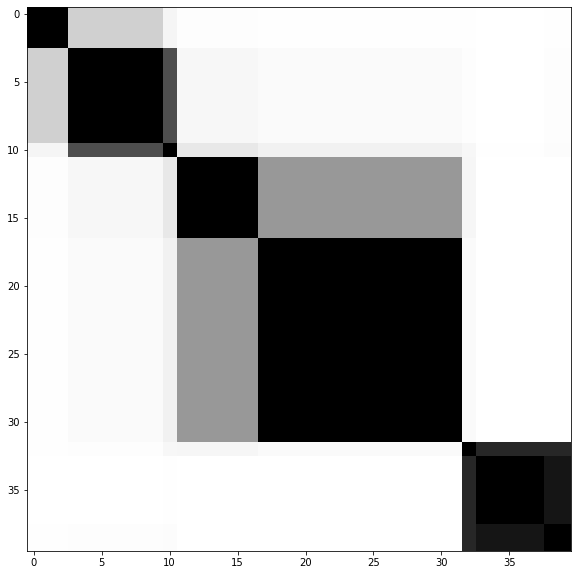

In [8]:
pyclustertend.vat(df_bv)

# Grafica codo

Inertia con i  1    valor  41320.00000000002
Inertia con i  2    valor  21226.460051195845
Inertia con i  3    valor  8800.184211764057
Inertia con i  4    valor  3089.5380495481927
Inertia con i  5    valor  310.2948674729008


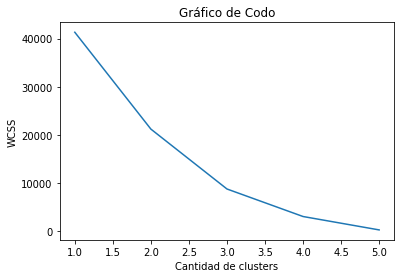

In [9]:
numeroClusters = range(1,6)

wcss = []
# Obtenemos 10 posibles clusters
for i in numeroClusters:
    # Se calcula la kmean con esa cantidad de clusters
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    # Obtenemos la inercia
    wcss.append(kmeans.inertia_)
    print("Inertia con i ", i, "   valor ", kmeans.inertia_)

# Graficando
plt.plot(numeroClusters, wcss)
plt.xlabel("Cantidad de clusters")
plt.ylabel("WCSS")
plt.title("Gráfico de Codo")
plt.show()

# Construyendo modelo

In [10]:
number_clusters = 3

In [11]:
kmeans_cluster = KMeans(n_clusters=number_clusters, max_iter=3)
kmeans_cluster.fit(X_scale)
kmeans_result = kmeans_cluster.predict(X_scale)
clusters = kmeans.labels_

In [12]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X_scale)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [13]:
data['cluster'] = clusters
data['x0'] = x0
data['x1'] = x1

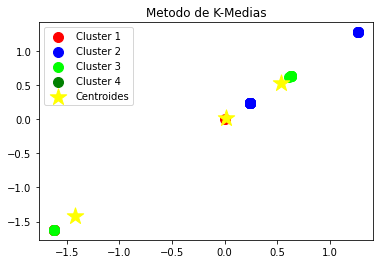

In [15]:
# Plot
plt.scatter(X_scale[kmeans_result == 0, 0], X_scale[kmeans_result == 0, 1], s = 100, c = 'red', label = "Cluster 1")
plt.scatter(X_scale[kmeans_result == 1, 0], X_scale[kmeans_result == 1, 1], s = 100, c = 'blue', label = "Cluster 2")
plt.scatter(X_scale[kmeans_result == 2, 0], X_scale[kmeans_result == 2, 1], s = 100, c = 'lime', label = "Cluster 3")
plt.scatter(X_scale[kmeans_result == 3, 0], X_scale[kmeans_result == 3, 1], s = 100, c = 'green', label = "Cluster 4")



plt.scatter(kmeans_cluster.cluster_centers_[:,0], kmeans_cluster.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Metodo de K-Medias")

# plt.xlabel(colmns[0])
# plt.ylabel(columns[1])
plt.legend()
plt.show()

In [16]:
data['Cluster'] = kmeans_result

# Silhouette

For n_clusters = 3 The average silhouette_score of K-Means is: 0.7228430373470548


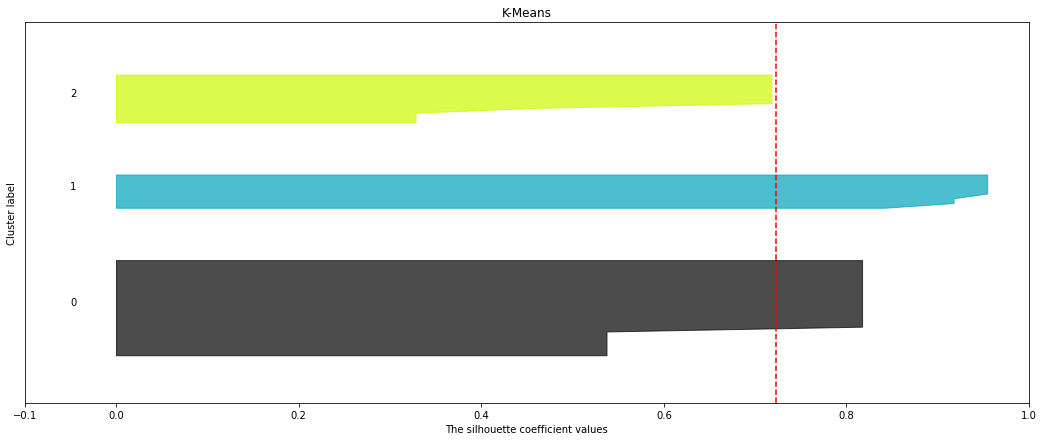

In [17]:
def make_silhouette(clusterer, n_clusters, label):
    fig, ax = plt.subplots(figsize=(1,1))
    fig.set_size_inches(18, 7)

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

    cluster_labels = clusterer.fit_predict(X_scale)

    silhouette_avg = silhouette_score(X_scale, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score of",
        label,
        'is:',
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(df_bv, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(label)
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

make_silhouette(kmeans_cluster, number_clusters, 'K-Means')
plt.show()

# Jaccard

In [18]:
# quantitative_variables = ["dll encoded", "functions encoded"]

# for i in range(number_clusters):
#     print("Cluster num: ", i)
#     cluster = data[data["Cluster"] == i]

#     res = distance.jaccard(cluster[quantitative_variables[0]], cluster[quantitative_variables[1]])
#     print("Jaccard distance: ", res)

#     res = 1 - pdist(cluster[[quantitative_variables[0], quantitative_variables[1]]], 'jaccard')
#     dist = squareform(res)
#     print("Matrix 2D: ")
#     print(dist)
#     print("\n\n")